<a href="https://colab.research.google.com/github/abhishek-marathe04/learning-pytorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

* Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

## 1. Make classification data and get it ready

In [163]:
import sklearn

In [164]:
from sklearn.datasets import make_circles

# Make 1000 Samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [165]:
len(X), len(y)

(1000, 1000)

In [166]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [167]:
# Make Dataframe of circle Data
import pandas as pd
circles = pd.DataFrame({ "X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


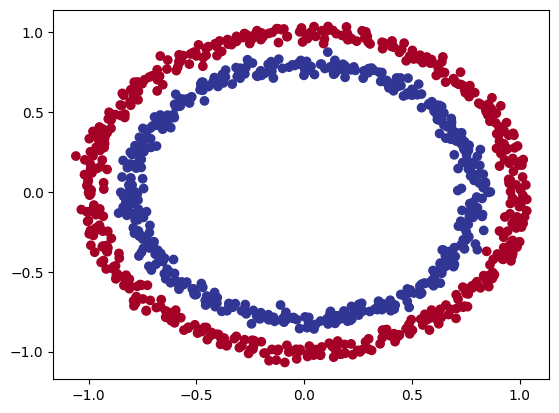

In [168]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [169]:
X.shape, y.shape

((1000, 2), (1000,))

In [170]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [171]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [172]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [173]:
# Turn data into tensors
import torch
torch.__version__

'2.9.0+cu126'

In [174]:
type(X)

numpy.ndarray

In [175]:
# Turn into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [176]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [177]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test data
                                                    random_state=42
                                                    )

In [178]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [179]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [180]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [181]:
class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.tensor) -> torch.tensor :
    return self.layer_2(self.layer_1(x))

In [182]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [183]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [184]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5121, -0.1552],
                      [-0.1814, -0.5101],
                      [ 0.0919, -0.1380],
                      [ 0.2901,  0.0406],
                      [ 0.6943,  0.1932]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.4698,  0.6617, -0.0956,  0.6123, -0.2142], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2988,  0.2609,  0.0093,  0.2129, -0.1202]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.3363], device='cuda:0'))])

In [185]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a defintion on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723
* For different optimizers see `torch.optim`

In [186]:
# Lets create loss function
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [187]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [188]:
# Model will output raw logits
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2508],
        [-0.2461],
        [-0.1763],
        [-0.2722],
        [-0.0385]], device='cuda:0')

In [189]:
# Covert raw logits into prediction probablities using activation function
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs[:5]

tensor([[0.4376],
        [0.4388],
        [0.4560],
        [0.4324],
        [0.4904]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [190]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

y_preds.squeeze()

tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [191]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [192]:
# Build and train model

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  # Train
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # 3. Zero grad
  optimiser.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Update parameters
  optimiser.step()

    ### Perform testing every 20 epochs
  if epoch % 100 == 0:

    # Put model in evaluation mode and setup inference context
    with torch.inference_mode():

      # 1. Forward pass
      y_logits_test = model_0(X_test).squeeze()
      y_preds_test = torch.round(torch.sigmoid(y_logits_test))

      # 2. Calculate test loss
      test_loss = loss_fn(y_logits_test, y_test)
      test_acc = accuracy_fn(y_test, y_preds_test)

      # Print out what's happening
      print(f"Epoch: {epoch} \n | Train loss: {loss:.3f} Train accuracy: {acc} \n | Test loss: {test_loss:.3f} | Test accuracy: {test_acc}")



Epoch: 0 
 | Train loss: 0.697 Train accuracy: 50.0 
 | Test loss: 0.695 | Test accuracy: 50.0
Epoch: 100 
 | Train loss: 0.694 Train accuracy: 49.25 
 | Test loss: 0.693 | Test accuracy: 49.5
Epoch: 200 
 | Train loss: 0.693 Train accuracy: 50.625 
 | Test loss: 0.693 | Test accuracy: 44.5
Epoch: 300 
 | Train loss: 0.693 Train accuracy: 49.875 
 | Test loss: 0.694 | Test accuracy: 50.5
Epoch: 400 
 | Train loss: 0.693 Train accuracy: 50.0 
 | Test loss: 0.694 | Test accuracy: 49.0
Epoch: 500 
 | Train loss: 0.693 Train accuracy: 50.74999999999999 
 | Test loss: 0.694 | Test accuracy: 48.0
Epoch: 600 
 | Train loss: 0.693 Train accuracy: 51.125 
 | Test loss: 0.694 | Test accuracy: 46.0
Epoch: 700 
 | Train loss: 0.693 Train accuracy: 51.24999999999999 
 | Test loss: 0.694 | Test accuracy: 46.0
Epoch: 800 
 | Train loss: 0.693 Train accuracy: 51.37500000000001 
 | Test loss: 0.694 | Test accuracy: 46.5
Epoch: 900 
 | Train loss: 0.693 Train accuracy: 51.37500000000001 
 | Test loss: 0

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [193]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


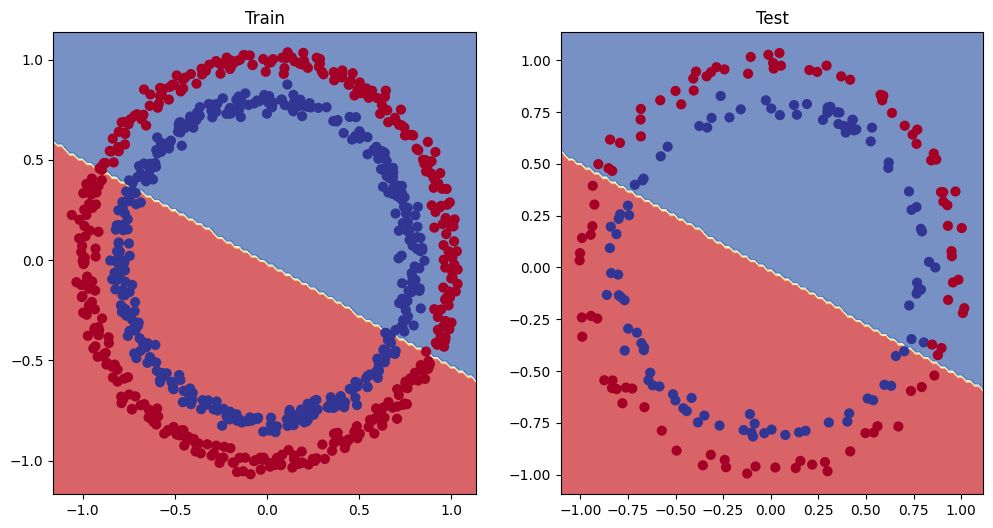

In [194]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [195]:
class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.tensor) -> torch.tensor :
    return self.layer_3(self.layer_2((self.layer_1(x))))

In [196]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [197]:
# Build and train model

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  # Train
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # 3. Zero grad
  optimiser.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Update parameters
  optimiser.step()

    ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    with torch.inference_mode():

      # 1. Forward pass
      y_logits_test = model_0(X_test).squeeze()
      y_preds_test = torch.round(torch.sigmoid(y_logits_test))

      # 2. Calculate test loss
      test_loss = loss_fn(y_logits_test, y_test)
      test_acc = accuracy_fn(y_test, y_preds_test)

      # Print out what's happening
      print(f"Epoch: {epoch} \n | Train loss: {loss:.3f} Train accuracy: {acc} \n | Test loss: {test_loss:.3f} | Test accuracy: {test_acc}")



Epoch: 0 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 20 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 40 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 60 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 80 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 100 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 120 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 140 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 160 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 180 
 | Train loss: 0.703 Train accuracy: 53.5 
 | Test loss: 0.704 | Test accuracy: 53.0
Epoch: 200 
 | Train loss: 0.703 Tra

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [198]:
# Lets try to create linear data to see if model is able predict it or not

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# # Create a train/test split
# train_split = int(0.8 * len(X_regression))
# X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
# X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

In [199]:
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [200]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

In [201]:
def plot_predictions(train_data=X_train_regression,
                     train_labels=y_train_regression,
                     test_data=X_test_regression,
                     test_labels=y_test_regression,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

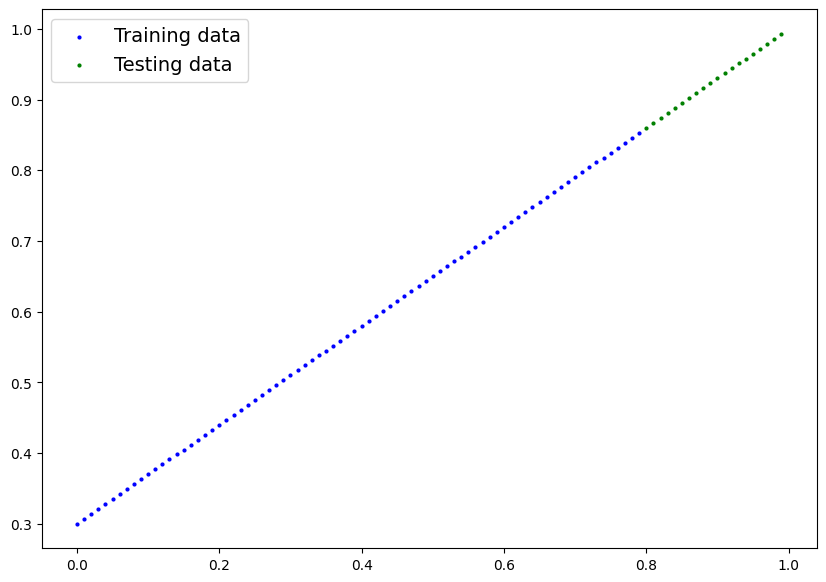

In [202]:
plot_predictions();

In [203]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [204]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [205]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_2.parameters(), # we want to optimize the parameters present in our model
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [206]:
# Build and train model

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):

  # # Train

  # # 1. Forward pass
  y_preds = model_2(X_train_regression)

  # # 2.Calculate the loss
  loss = loss_fn(y_preds, y_train_regression)

  # # 3. Zero grad
  optimizer.zero_grad()

  # # 4. Backpropogation
  loss.backward()

  # # 5. Update parameters
  optimizer.step()

    ### Perform testing every 20 epochs
  if epoch % 100 == 0:

  #   # Put model in evaluation mode and setup inference context
    with torch.inference_mode():

  #     # 1. Forward pass
      test_pred = model_2(X_test_regression)

  #     # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test_regression)

  #     # Print out what's happening
      print(f"Epoch: {epoch} \n | Train loss: {loss:.3f} | Test loss: {test_loss:.3f} ")


Epoch: 0 
 | Train loss: 0.671 | Test loss: 1.083 
Epoch: 100 
 | Train loss: 0.092 | Test loss: 0.221 
Epoch: 200 
 | Train loss: 0.026 | Test loss: 0.052 
Epoch: 300 
 | Train loss: 0.016 | Test loss: 0.064 
Epoch: 400 
 | Train loss: 0.020 | Test loss: 0.064 
Epoch: 500 
 | Train loss: 0.022 | Test loss: 0.064 
Epoch: 600 
 | Train loss: 0.022 | Test loss: 0.062 
Epoch: 700 
 | Train loss: 0.020 | Test loss: 0.060 
Epoch: 800 
 | Train loss: 0.020 | Test loss: 0.059 
Epoch: 900 
 | Train loss: 0.020 | Test loss: 0.058 


In [207]:
with torch.inference_mode():
  y_preds_regression = model_2(X_test_regression)

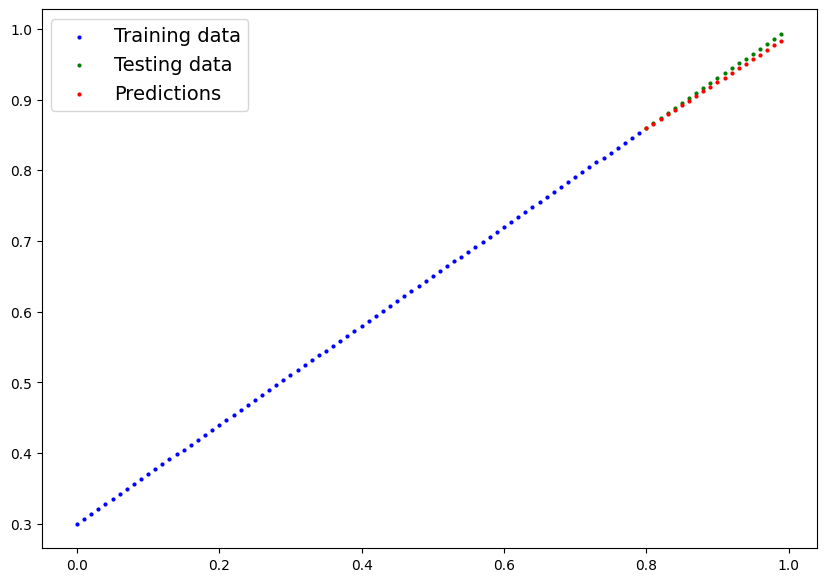

In [208]:
plot_predictions(predictions=y_preds_regression.cpu());

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

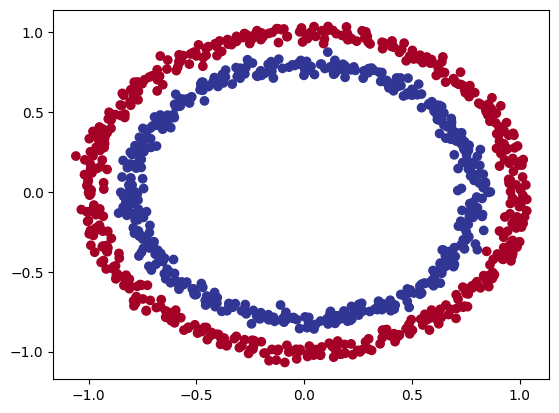

In [209]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [210]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [211]:
class CircleModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.tensor) -> torch.tensor :
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [212]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [213]:
# Lets create loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [214]:
# Build and train model

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  # Train
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Update parameters
  optimizer.step()

    ### Perform testing every 20 epochs
  if epoch % 100 == 0:

    # Put model in evaluation mode and setup inference context
    with torch.inference_mode():

      # 1. Forward pass
      y_logits_test = model_3(X_test).squeeze()
      y_preds_test = torch.round(torch.sigmoid(y_logits_test))

      # 2. Calculate test loss
      test_loss = loss_fn(y_logits_test, y_test)
      test_acc = accuracy_fn(y_test, y_preds_test)

      # Print out what's happening
      print(f"Epoch: {epoch} \n | Train loss: {loss:.3f} Train accuracy: {acc} \n | Test loss: {test_loss:.3f} | Test accuracy: {test_acc}")



Epoch: 0 
 | Train loss: 0.697 Train accuracy: 50.0 
 | Test loss: 0.697 | Test accuracy: 50.0
Epoch: 100 
 | Train loss: 0.691 Train accuracy: 54.0 
 | Test loss: 0.691 | Test accuracy: 50.5
Epoch: 200 
 | Train loss: 0.689 Train accuracy: 53.75 
 | Test loss: 0.690 | Test accuracy: 53.0
Epoch: 300 
 | Train loss: 0.687 Train accuracy: 55.375 
 | Test loss: 0.689 | Test accuracy: 54.50000000000001
Epoch: 400 
 | Train loss: 0.684 Train accuracy: 56.125 
 | Test loss: 0.686 | Test accuracy: 53.5
Epoch: 500 
 | Train loss: 0.680 Train accuracy: 59.25 
 | Test loss: 0.683 | Test accuracy: 55.00000000000001
Epoch: 600 
 | Train loss: 0.673 Train accuracy: 63.0 
 | Test loss: 0.679 | Test accuracy: 56.00000000000001
Epoch: 700 
 | Train loss: 0.662 Train accuracy: 66.25 
 | Test loss: 0.672 | Test accuracy: 57.49999999999999
Epoch: 800 
 | Train loss: 0.646 Train accuracy: 65.625 
 | Test loss: 0.661 | Test accuracy: 57.49999999999999
Epoch: 900 
 | Train loss: 0.624 Train accuracy: 67.125

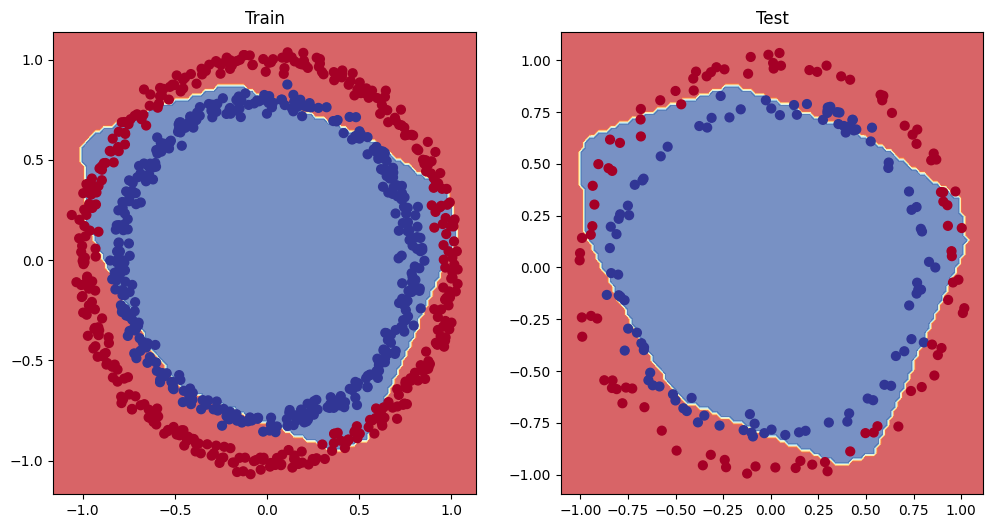

In [215]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)